# logB distribution

In [1]:
import pandas as pd
import scipy
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import bilby
import corner

from glob import glob

In [2]:
file_array = glob("../../support_material_2308.01017/echo_wave_injection/*/*N100*new*.csv")
file_array

['../../support_material_2308.01017/echo_wave_injection/w1Xin/N100_npoints=2000_6parameter_echoamplitude=160_newlikelihood_all.csv',
 '../../support_material_2308.01017/echo_wave_injection/w1specM50RbolT10Chi0.69/N100_npoints=2000_6parameter_echoamplitude=57_newlikelihood_all.csv',
 '../../support_material_2308.01017/echo_wave_injection/w1specM50RdV0.2Chi0.69/N100_npoints=2000_6parameter_echoamplitude=29_newlikelihood_all.csv',
 '../../support_material_2308.01017/echo_wave_injection/w1specM50Rw0.99Chi0.69/N100_npoints=2000_6parameter_echoamplitude=34_newlikelihood_all.csv',
 '../../support_material_2308.01017/echo_wave_injection/noise/N100_npoints=2000_6parameter_echoamplitude=0_newlikelihood_all.csv']

In [3]:
duration_array_str = glob("../../support_material_2308.01017/echo_wave_injection/echo_waves/*.dat")
duration_array_str.sort()
# print(duration_array_str)
for i in range(len(duration_array_str)):
    duration_array_str[i] = duration_array_str[i].split("/")[-1].split("N")[1].split('.')[0]
duration_array_str = list(dict.fromkeys(duration_array_str))
duration_array_str

['010', '020', '050', '100', '150', '200']

In [4]:
duration_array = np.array([int(x) for x in duration_array_str])*2
duration_array

array([ 20,  40, 100, 200, 300, 400])

In [5]:
file_array_new = glob('../../support_material_2308.01017/echo_wave_injection/noise/*new*.csv')
file_array_old = glob('../../support_material_2308.01017/echo_wave_injection/noise/*old*.csv')
np.shape(file_array_new)

(6,)

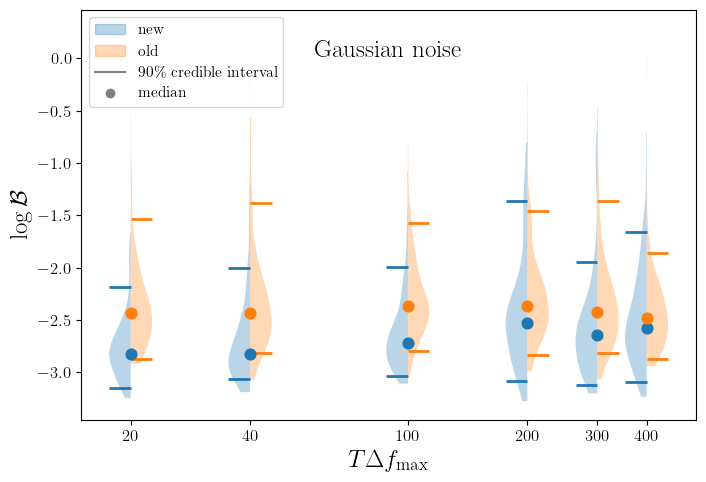

In [6]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
# min & max use solid line
# median use point
name_string = 'noise'
# quantilesnew = [[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
# quantilesold = [[0,1],[0,1],[0,1],[0,1],[0,1],[0,1]]
# quantilesnew = [[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95]]
# quantilesold = [[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95]]
fig, ax = plt.subplots(figsize = (7.5,5))
ax.set_position([0.14, 0.14, 0.82, 0.82])
labels = []

new_likelihood_logB = []
old_likelihood_logB = []
for file_new,file_old in zip(file_array_new,file_array_old):
    data = pd.read_csv(file_new)
    log_b = data["logB"]
    new_likelihood_logB.append(log_b.values)
    data = pd.read_csv(file_old)
    log_b = data["logB"]
    old_likelihood_logB.append(log_b.values)
parts1 = ax.violinplot(new_likelihood_logB,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
parts2 = ax.violinplot(old_likelihood_logB,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
quantile_values = [5, 95]
positions = np.log(duration_array)
for i, pos in enumerate(positions):
    lower1, upper1 = np.percentile(new_likelihood_logB[i], quantile_values)
    lower2, upper2 = np.percentile(old_likelihood_logB[i], quantile_values)
    ax.hlines([lower1, upper1], pos-0.25/2, pos, color='C0', lw=2)
    ax.hlines([lower2, upper2], pos, pos+0.25/2, color='C1', lw=2)
for pc in parts1['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, vertices[:, 0].mean())

for pc in parts2['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], vertices[:, 0].mean(),np.inf)

parts1['zorder'] = 1
ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 12)
patch1 = mpatches.Patch(color=parts1["bodies"][0].get_facecolor().flatten(), label='new')
patch2 = mpatches.Patch(color=parts2["bodies"][0].get_facecolor().flatten(), label='old')
patch3 = mpatches.Patch(alpha=0.2, color='gray', label='noise level')
line1 = mlines.Line2D([], [], color='grey', label='90\% credible interval')
points1 = mlines.Line2D([], [], color='grey', marker='o',linestyle='None', label='median')
positions = np.log(duration_array)
medians1 = [np.median(x) for x in new_likelihood_logB]
ax.scatter(positions, medians1, marker='o', color=parts1["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
medians2 = [np.median(x) for x in old_likelihood_logB]
ax.scatter(positions, medians2, marker='o', color=parts2["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
ax.text(0.5, 0.9, 'Gaussian noise', horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize = 18)
# if name_string != 'noise':
#     ax.fill_between(np.log(duration_array), new_likelihood_logB_upper, new_likelihood_logB_lower, alpha=0.2, color='gray')
#     ax.fill_between(np.log(duration_array), old_likelihood_logB_upper, old_likelihood_logB_lower, alpha=0.2, color='gray')
ax.set_xlabel(r'$T\Delta f_{\mathrm{max}}$',fontsize = 18)
ax.set_ylabel(r'$\log \mathcal{B}$',fontsize = 18)
plt.yticks(fontsize = 12)
plt.legend(handles=[patch1, patch2, line1, points1], loc=2,fontsize = 11)
plt.savefig('logB_violinplot_gaussian_divided.pdf',dpi=300)
plt.show()
plt.close()

# SNR

In [7]:
import pickle
with open('gaussian_noise_SNR_newlikelihood.pickle',"rb") as fp:
    new_likelihood_SNR = pickle.load(fp)
with open('gaussian_noise_SNR_oldlikelihood.pickle',"rb") as fp:
    old_likelihood_SNR = pickle.load(fp)

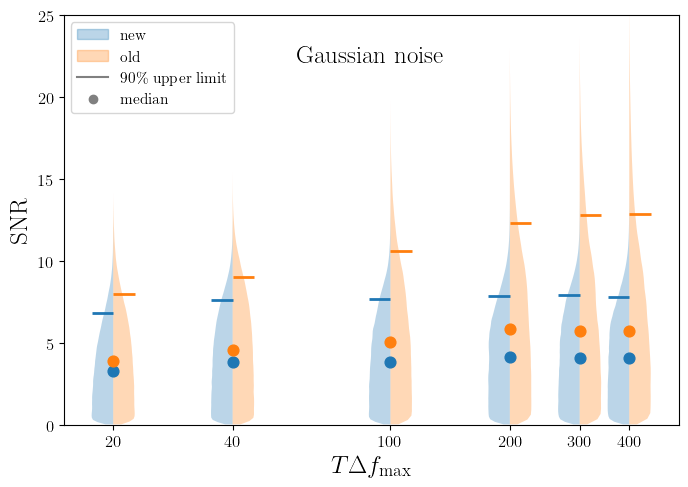

In [8]:

# quantiles8 = [[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95]]
# quantiles7 = [[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95],[0.05,0.95]]
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize = (7.5,5))
ax.set_position([0.14, 0.14, 0.82, 0.82])
labels = []
parts1 = ax.violinplot(new_likelihood_SNR,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
parts2 = ax.violinplot(old_likelihood_SNR,positions=np.log(duration_array),showmedians=False,widths = 0.25,showextrema=False)
# quantile_values = [5, 95]
quantile_values = [0, 90]
positions = np.log(duration_array)
for i, pos in enumerate(positions):
    lower1, upper1 = np.percentile(new_likelihood_SNR[i], quantile_values)
    lower2, upper2 = np.percentile(old_likelihood_SNR[i], quantile_values)
    # ax.hlines([lower1, upper1], pos-0.25/2, pos, color='C0', lw=2)
    # ax.hlines([lower2, upper2], pos, pos+0.25/2, color='C1', lw=2)
    ax.hlines([upper1], pos-0.25/2, pos, color='C0', lw=2)
    ax.hlines([upper2], pos, pos+0.25/2, color='C1', lw=2)
for pc in parts1['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], -np.inf, vertices[:, 0].mean())

for pc in parts2['bodies']:
    for path in pc.get_paths():
        vertices = path.vertices
        vertices[:, 0] = np.clip(vertices[:, 0], vertices[:, 0].mean(),np.inf)

ax.set_xticks(np.log(duration_array))
ax.set_xticklabels([str(x) for x in duration_array],fontsize = 12)

patch1 = mpatches.Patch(color=parts1["bodies"][0].get_facecolor().flatten(), label='new')
patch2 = mpatches.Patch(color=parts2["bodies"][0].get_facecolor().flatten(), label='old')
#patch3 = mpatches.Patch(alpha=0.2, color='gray', label='noise level')
#patch2 = mpatches.Patch(color='C1', label='oldlikelihood')
line1 = mlines.Line2D([], [], color='grey', label='90\% upper limit')
points1 = mlines.Line2D([], [], color='grey', marker='o',linestyle='None', label='median')

# line3 = mlines.Line2D([], [], color='green',ls='--', label='SNR theory trend')
#ax.axhline(-2.5,color = 'r',ls = '--',label = 'noise level')
positions = np.log(duration_array)
medians1 = [np.median(x) for x in new_likelihood_SNR]
#medians1= np.percentile(new_likelihood_logB, 50, axis=1)
ax.scatter(positions, medians1, marker='o', color=parts1["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
#medians2 = np.percentile(old_likelihood_logB, 50, axis=1)
medians2 = [np.median(x) for x in old_likelihood_SNR]
ax.scatter(positions, medians2, marker='o', color=parts2["bodies"][0].get_facecolor().flatten(), s=60, zorder=3,alpha = 1)
# ax.plot(positions,snr_array_part,color = 'green',ls = '--',label = 'SNR theory trend')
ax.set_xlabel(r'$T\Delta f_{\mathrm{max}}$',fontsize = 18)
ax.set_ylabel('SNR',fontsize = 18)
ax.text(0.5, 0.9, "Gaussian noise", horizontalalignment='center',verticalalignment='center', transform=ax.transAxes,fontsize = 18)
# ax.set_yscale('log')
ax.set_ylim(0,25)
plt.yticks(fontsize = 12)
plt.legend(handles=[patch1, patch2, line1, points1], loc=2,fontsize = 11)
plt.savefig('SNR_violinplot_gaussian_divided.pdf',dpi=300)
plt.show()
plt.close()


# SNR with max and min logB

In [9]:
import bilby

In [10]:
overall_SNR_new = new_likelihood_SNR[-1].values
overall_SNR_old = old_likelihood_SNR[-1].values

max_SNR_old = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_oldlikelihoodi62_SNR_result.json').posterior['SNR']
min_SNR_old = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_oldlikelihoodi68_SNR_result.json').posterior['SNR']
max_logb_old = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_oldlikelihoodi62_SNR_result.json').log_evidence
min_logb_old = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_oldlikelihoodi68_SNR_result.json').log_evidence

max_SNR_new = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_newlikelihoodi2_SNR_result.json').posterior['SNR']
min_SNR_new = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_newlikelihoodi13_SNR_result.json').posterior['SNR']
max_logb_new = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_newlikelihoodi2_SNR_result.json').log_evidence
min_logb_new = bilby.core.result.read_in_result('N200_npoints=2000_6parameter_echoamplitude=0_newlikelihoodi13_SNR_result.json').log_evidence

In [11]:
def draw_horizontal_split_violin(ax, data, pos, color, bins=50, bandwidth='scott',height=0.5, side=1):
    kde = scipy.stats.gaussian_kde(data, bw_method=bandwidth)
    x_range = np.linspace(data.min() - 0.5, data.max() + 0.5, 500)
    density = kde(x_range)

    counts, bin_edges = np.histogram(data, bins=bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    bin_width = np.diff(bin_edges)

    scale_factor = 0.3 / density.max() # scale KDE and hist
    ax.bar(bin_centers, side * counts * scale_factor, width=bin_width, bottom=pos,
            color=color, alpha=0.4, edgecolor=None, zorder=1)
    ax.plot(x_range, pos + side * density * scale_factor, alpha=0.4, color=color, lw=1.2, zorder=3)


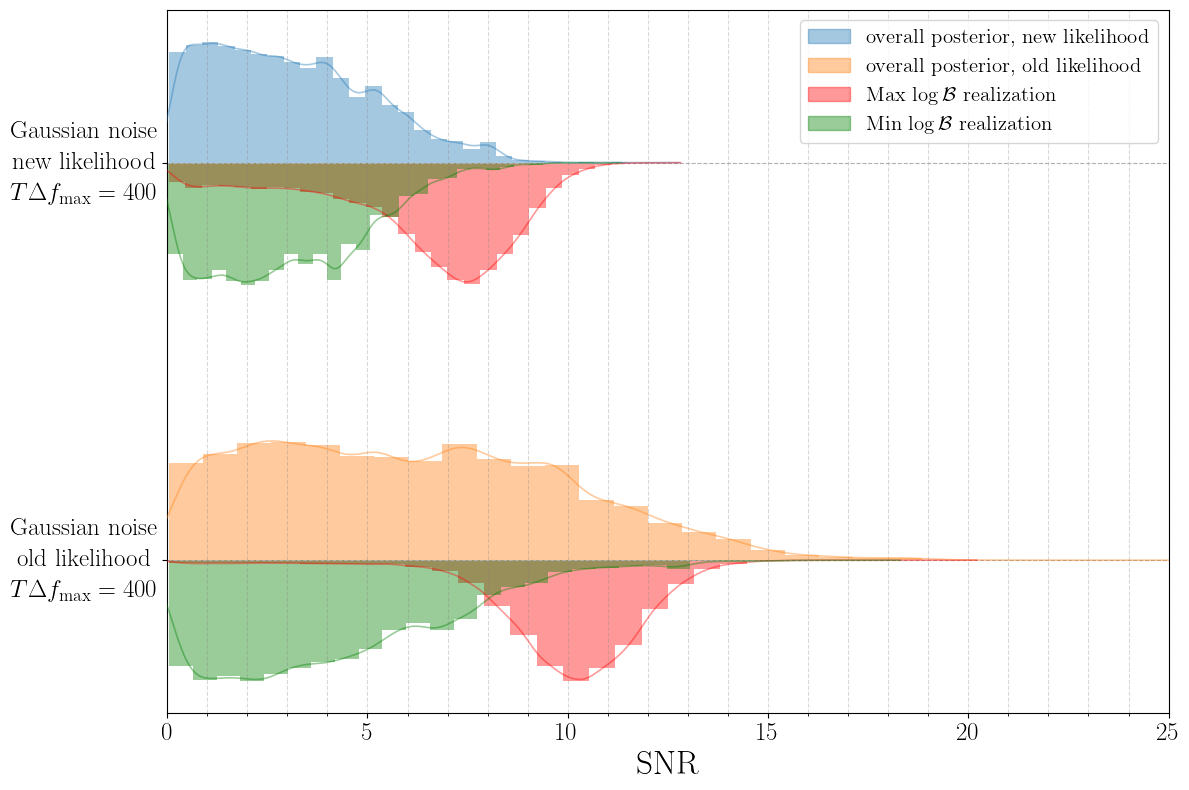

In [12]:
from matplotlib.ticker import FixedLocator
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

fig, ax = plt.subplots(figsize=(12, 8))
# for data, side, color, label in zip(datasets, sides, colors, labels):
draw_horizontal_split_violin(ax, overall_SNR_new[0:50000], pos=2, color='C0', bins=30,  side=1)
draw_horizontal_split_violin(ax, max_SNR_new, pos=2, color='red', bins=30, side=-1)
draw_horizontal_split_violin(ax, min_SNR_new, pos=2, color='green', bins=30, side=-1)

draw_horizontal_split_violin(ax, overall_SNR_old[0:50000], pos=1, color='C1', bins=30,  side=1)
draw_horizontal_split_violin(ax, max_SNR_old, pos=1, color='red', bins=30, side=-1)
draw_horizontal_split_violin(ax, min_SNR_old, pos=1, color='green', bins=30, side=-1)


ax.set_yticks(range(1, 3))
ax.grid(axis='y', linestyle='--', alpha=1)
ax.xaxis.set_minor_locator(FixedLocator(np.arange(0,25,1)))
ax.grid(True, which='both', axis='x', linestyle='--', color='gray', alpha=0.3)

# labels = [
#     r'Gaussian noise \n old likelihood \n $T\Delta f_{\mathrm{max}}=400$',
#     r'Gaussian noise \n new likelihood \n $T\Delta f_{\mathrm{max}}=400$',
# ]

labels = [
    r'\begin{tabular}{c} Gaussian noise \\ old likelihood \\ $T\Delta f_{\mathrm{max}}=400$ \end{tabular}',
    r'\begin{tabular}{c} Gaussian noise \\ new likelihood \\ $T\Delta f_{\mathrm{max}}=400$ \end{tabular}',
]
ax.set_yticklabels(labels, fontsize=18, ha='right', va='center')
for label in ax.get_yticklabels():
    label.set_multialignment('center')

ax.set_xlabel('SNR',fontsize = 24)
patch1 = mpatches.Patch(color='C0', alpha=0.4, label='overall posterior, new likelihood')
patch2 = mpatches.Patch(color='C1', alpha=0.4, label='overall posterior, old likelihood')
patch3 = mpatches.Patch(color='red', alpha=0.4, label=r'Max $\log\mathcal{B}$ realization')
patch4 = mpatches.Patch(color='green', alpha=0.4, label=r'Min $\log\mathcal{B}$ realization')
plt.legend(handles=[patch1, patch2, patch3, patch4], loc=1,fontsize = 15)
plt.xticks(fontsize = 18)
plt.xlim(0,25)
plt.tight_layout()
plt.savefig('SNR_gaussian_cases.pdf',dpi=300)
plt.show()